In [3]:
from datetime import datetime
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load statistics

In [4]:

FIGURE_OUTPUT_DIR = Path("output/figures/statistics")
FIGURE_OUTPUT_DIR.mkdir(exist_ok=True)

# To generate a new stats file run the script save_trajectory_proj_and_stats.py!
STATS_BASE_DIR = Path("output/statistics/hist/")

separated_mu = pd.read_csv(STATS_BASE_DIR / "tf100ms_2_separated_mu" / "all_fragments.csv")
classified_all = pd.read_csv(STATS_BASE_DIR / "tf100ms_2024-07-25_21-15-42" / "all_fragments.csv")

print(separated_mu.columns)
print(classified_all.columns)

display(classified_all.head())
display(classified_all.count())

Index(['scene', 'instance_id', 'fragment_id', 'class', 'traj_evnt_count',
       'traj_len_s', 'frag_evnt_count', 'frag_len_s'],
      dtype='object')
Index(['scene', 'instance_id', 'fragment_id', 'class', 'traj_evnt_count',
       'traj_len_s', 'frag_evnt_count', 'frag_len_s'],
      dtype='object')


,scene,instance_id,fragment_id,class,traj_evnt_count,traj_len_s,frag_evnt_count,frag_len_s
0,3_m-h-h,0,0,bee,217225,30.246,2748,0.1
1,3_m-h-h,0,1,bee,217225,30.246,1602,0.1
2,3_m-h-h,0,2,bee,217225,30.246,881,0.1
3,3_m-h-h,0,3,bee,217225,30.246,977,0.1
4,3_m-h-h,0,4,bee,217225,30.246,690,0.1


scene              6320
instance_id        6320
fragment_id        6320
class              6320
traj_evnt_count    6320
traj_len_s         6320
frag_evnt_count    6320
frag_len_s         6320
dtype: int64

In [5]:
# clear class names for datasets not yet classified
separated_mu["class"] = "unclassified"
display(separated_mu.head())

,scene,instance_id,fragment_id,class,traj_evnt_count,traj_len_s,frag_evnt_count,frag_len_s
0,1_l-l-l,0,0,unclassified,1015970,40.426,43,0.1
1,1_l-l-l,0,1,unclassified,1015970,40.426,14,0.1
2,1_l-l-l,0,2,unclassified,1015970,40.426,290,0.1
3,1_l-l-l,0,3,unclassified,1015970,40.426,630,0.1
4,1_l-l-l,0,4,unclassified,1015970,40.426,450,0.1


In [11]:
# Combine dataframes
classified_scenes = classified_all["scene"].unique()
df = separated_mu[~separated_mu["scene"].isin(classified_scenes)]
print(df["scene"].unique())
df = pd.concat([df, classified_all])
print("all fragments", len(df.index))

# combine all
# df = pd.concat([combined_mu, classified_pf])
# display(df["scene"].unique())
# print("Total fragment count:", len(df))

['1_l-l-l' '2_l-h-l' '4_m-m-h' '5_h-l-h' '6_h-h-h_filtered']
all fragments 9628


## Class overview
### Number of trajectories per class

class
bee              65
bumblebee         5
butterfly        22
dragonfly        22
insect           70
unclassified    152
wasp             21
dtype: int64

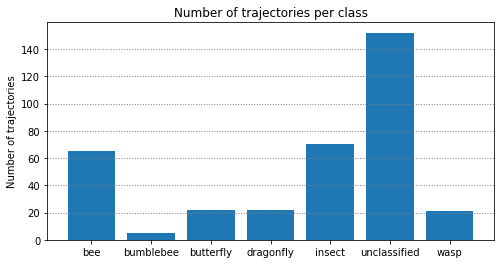

In [12]:
# gesucht: Anzahl instances pro Klasse
# group by class
# unique over scene and instance_id
df1 = df.groupby("class").apply(lambda x: len(x[["scene", "instance_id"]].drop_duplicates()))
display(df1)

plt.figure(figsize=(8,4))
plt.bar(df1.index, df1)
plt.title("Number of trajectories per class")
plt.ylabel("Number of trajectories")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.savefig(FIGURE_OUTPUT_DIR/"Number of trajectories per class.png", format="png", bbox_inches="tight", dpi=200)
plt.show()

### Number of fragments per class (unfiltered)

class
bee             3671
bumblebee        206
butterfly       1078
dragonfly        214
insect           527
unclassified    3308
wasp             624
dtype: int64

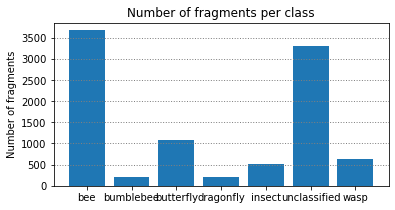

In [13]:
df1 = df.groupby("class").size()
display(df1)

plt.figure(figsize=(6,3))
plt.bar(df1.index, df1)
plt.title("Number of fragments per class")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.savefig(FIGURE_OUTPUT_DIR/"Number of fragments per class.png", format="png", bbox_inches="tight", dpi=200)
plt.show()

### Number of fragments per class (>= 2048)

class
bee             312
bumblebee        60
butterfly       225
dragonfly        96
insect          110
unclassified    597
wasp             23
dtype: int64

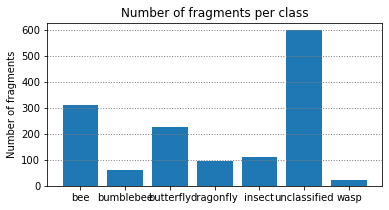

In [14]:
df1 = df[df["frag_evnt_count"] >= 2048].groupby("class").size()
display(df1)

plt.figure(figsize=(6,3))
plt.bar(df1.index, df1)
plt.title("Number of fragments per class")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.savefig(FIGURE_OUTPUT_DIR/"Number of fragments per class.png", format="png", bbox_inches="tight", dpi=200)
plt.show()

In [15]:
df1 = df.mean()
print("Mean overall values")
display(df1)

df1 = df[df["frag_evnt_count"] >= 2048].mean()
print("Mean overall values")
display(df1)

Mean overall values


C:\Users\Marc\AppData\Local\Temp\ipykernel_15456\2228449899.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1 = df.mean()


instance_id            18.102202
fragment_id            70.796323
traj_evnt_count    193715.488263
traj_len_s             14.203903
frag_evnt_count      2548.919921
frag_len_s              0.100000
dtype: float64

Mean overall values


C:\Users\Marc\AppData\Local\Temp\ipykernel_15456\2228449899.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1 = df[df["frag_evnt_count"] >= 2048].mean()


instance_id            16.083626
fragment_id            50.666198
traj_evnt_count    446894.206606
traj_len_s              9.923930
frag_evnt_count     15387.797611
frag_len_s              0.100000
dtype: float64

In [16]:
df1 = df.groupby(["class"]).mean()[["traj_evnt_count", "traj_len_s", "frag_evnt_count"]]
display(df1)

,traj_evnt_count,traj_len_s,frag_evnt_count
class,,,
bee,138120.101335,19.376579,627.353582
bumblebee,149701.446602,12.095874,1543.694175
butterfly,101126.295918,8.351153,2152.589981
dragonfly,31494.831776,1.082037,3236.490654
insect,37563.880455,1.432884,3355.214421
unclassified,352229.665961,14.669817,5068.604595
wasp,42450.945513,7.395870,595.740385


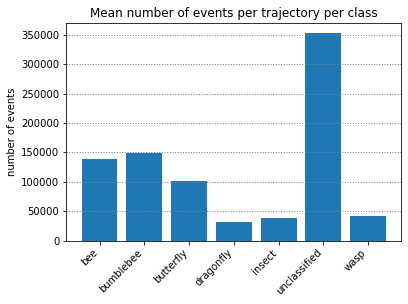

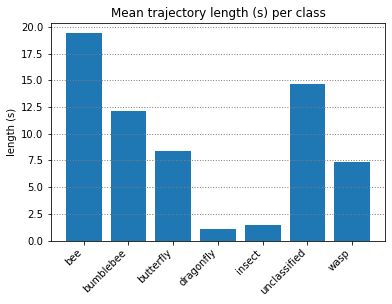

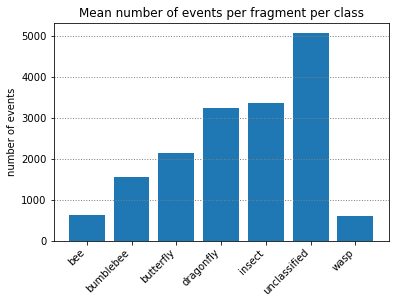

In [17]:
plt.bar(df1.index, df1["traj_evnt_count"])
plt.title("Mean number of events per trajectory per class")
plt.xticks(rotation=45, ha="right")
# plt.xlabel("Class")
plt.ylabel("number of events")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()

plt.bar(df1.index, df1["traj_len_s"])
plt.title("Mean trajectory length (s) per class")
plt.xticks(rotation=45, ha="right")
# plt.xlabel("Class")
plt.ylabel("length (s)")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()

plt.bar(df1.index, df1["frag_evnt_count"])
plt.title("Mean number of events per fragment per class")
plt.xticks(rotation=45, ha="right")
# plt.xlabel("Class")
plt.ylabel("number of events")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()


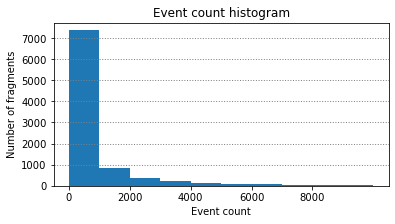

In [18]:
plt.figure(figsize=(6,3))
plt.hist(df["frag_evnt_count"], bins=list(range(0, 1000*10+1, 1000)))
plt.title("Event count histogram")
plt.xlabel("Event count")
plt.xticks(np.arange(0, 1000*10, 2000))
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.savefig(FIGURE_OUTPUT_DIR/"Event count histogram 2.png", format="png", bbox_inches="tight", dpi=200)
plt.show()

In [19]:
df1 = df[df["frag_evnt_count"] >= 4096 ]["scene"].count()
print("Number of fragments over all scenes with >= 4096 events:", df1)

df1 = df[df["frag_evnt_count"] >= 4096//2 ]["scene"].count()
print("Number of fragments over all scenes with >= 2048 events:", df1)

Number of fragments over all scenes with >= 4096 events: 807
Number of fragments over all scenes with >= 2048 events: 1423


scene
1_l-l-l                 1112
2_l-h-l                  590
3_m-h-h                 3075
4_m-m-h                  518
5_h-l-h                   61
6_h-h-h_filtered        1027
hauptsächlichBienen1     610
libellen1                216
mb-bum2-2                582
vieleSchmetterlinge2    1213
wespen1                   70
wespen2                  327
wespen3                  227
dtype: int64

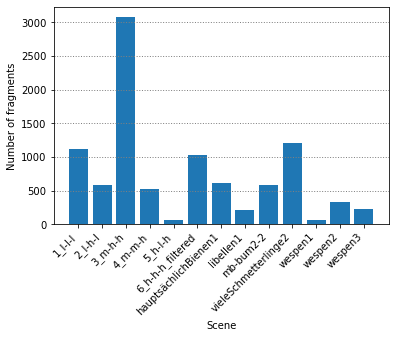

In [20]:
# number of fragments per scene
df1 = df.groupby("scene").size()
display(df1)

plt.bar(df1.index, df1)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Scene")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()


scene
1_l-l-l                 373
2_l-h-l                  75
3_m-h-h                 118
4_m-m-h                   4
6_h-h-h_filtered         22
hauptsächlichBienen1      3
libellen1                46
mb-bum2-2                39
vieleSchmetterlinge2    121
wespen2                   3
wespen3                   3
dtype: int64

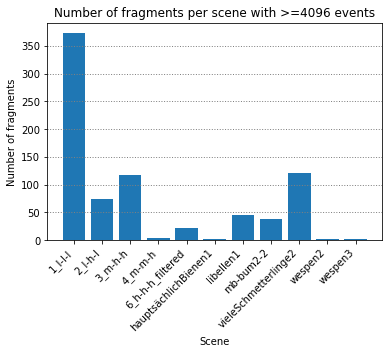

scene
1_l-l-l                 430
2_l-h-l                 110
3_m-h-h                 269
4_m-m-h                  25
6_h-h-h_filtered         32
hauptsächlichBienen1     15
libellen1                98
mb-bum2-2               135
vieleSchmetterlinge2    286
wespen1                   2
wespen2                   9
wespen3                  12
dtype: int64

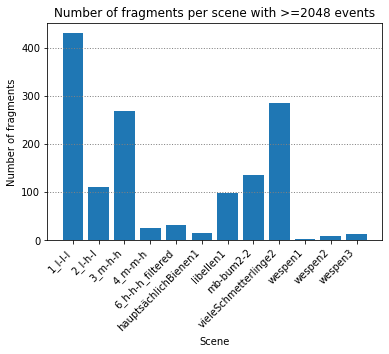

In [21]:
# number of fragments per scene WHERE >= 4096
df1 = df[df["frag_evnt_count"] >= 4096 ].groupby("scene").size()
display(df1)

plt.bar(df1.index, df1)
plt.title("Number of fragments per scene with >=4096 events")
plt.xlabel("Scene")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()


# number of fragments per scene WHERE >= 2048
df1 = df[df["frag_evnt_count"] >= 4096//2 ].groupby("scene").size()
display(df1)

plt.bar(df1.index, df1)
plt.title("Number of fragments per scene with >=2048 events")
plt.xlabel("Scene")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()
